In [6]:
# Jupyter notebook magic to reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys

sys.path.append("/home/Marc/Marc_network_sims")  # path to the code with the functions

## Select a condition and trial


In [15]:
import pickle

# Path to the pickle file with the results dictionary
pkl_path = "../Results/Noise_results/noise_0.75.pkl"

# Load the pickle file
try:
    with open(pkl_path, "rb") as file:
        single_noise_level_results = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

Data loaded successfully.


## Access a condition and trial


In [16]:
# # Accessing the tuple inside single_noise_level_results['gna_1.20_gk_1.20_noise_0.70']['00.pkl']
# my_tuple = single_noise_level_results["gna_1.20_gk_1.10_noise_0.70"]["03.pkl"]

# # Checking the type of the tuple
# print(type(my_tuple))

# # Unpacking the tuple if it's a tuple
# if isinstance(my_tuple, tuple):
#     # Unpacking the tuple and printing its contents
#     for item in my_tuple:
#         print(item)
# else:
#     print("The object is not a tuple.")

## Analyze per noise level


In [17]:
from src.SanjayCode import analyze_single_noise_level


# Assuming 'single_noise_level_results' is your dictionary for the current noise level
single_noise_level_analysis = analyze_single_noise_level(single_noise_level_results)

# Print the results
for variant, results in single_noise_level_analysis.items():
    print(f"Variant: {variant}")
    print(f"Depolarization Events: {results['Depolarization Events']}")
    print(f"Start Times: {results['Start Times']}")
    print(f"End Times: {results['End Times']}")
    print(f"Total Depolarization Duration: {results['Total Depolarization Duration']}")
    print(
        f"Average Depolarization Duration: {results['Average Depolarization Duration']}"
    )
    print(
        f"Percentage Depolarization Trials: {results['Percentage Depolarization Trials']}\n"
    )

Variant: gna_0.50_gk_0.80_noise_0.75
Depolarization Events: 1
Start Times: [4793]
End Times: [5000]
Total Depolarization Duration: 207
Average Depolarization Duration: 207.0
Percentage Depolarization Trials: 1 out of 15 (6.7%)

Variant: gna_0.60_gk_0.80_noise_0.75
Depolarization Events: 2
Start Times: [4819, 4787]
End Times: [5000, 5000]
Total Depolarization Duration: 394
Average Depolarization Duration: 197.0
Percentage Depolarization Trials: 2 out of 15 (13.3%)

Variant: gna_0.60_gk_0.90_noise_0.75
Depolarization Events: 2
Start Times: [1174, 4772]
End Times: [5000, 5000]
Total Depolarization Duration: 4054
Average Depolarization Duration: 2027.0
Percentage Depolarization Trials: 2 out of 15 (13.3%)

Variant: gna_0.70_gk_0.80_noise_0.75
Depolarization Events: 2
Start Times: [4627, 3777]
End Times: [5000, 5000]
Total Depolarization Duration: 1596
Average Depolarization Duration: 798.0
Percentage Depolarization Trials: 2 out of 15 (13.3%)

Variant: gna_0.70_gk_1.00_noise_0.75
Depolariz

## Matrix of single noise level


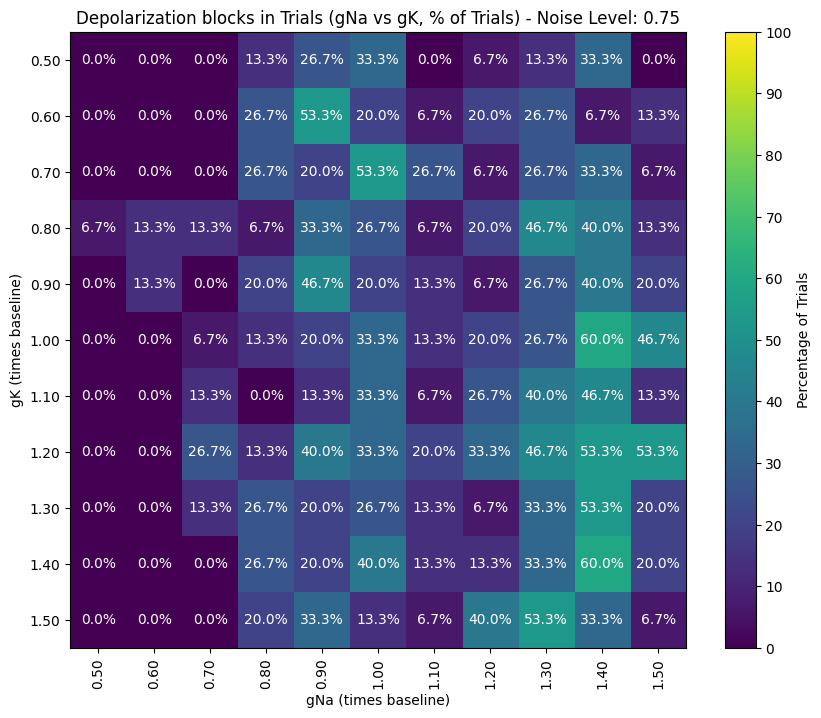

In [18]:
from src.SanjayCode import plot_depolarization_percentage_matrix

# Corrected gNa and gK values to match the specified range
gna_values = [0.50 + 0.10 * i for i in range(11)]
gk_values = [0.50 + 0.10 * i for i in range(11)]
noise_level = 0.75  # The noise level for the current analysis

# Plot the depolarization percentage matrix
plot_depolarization_percentage_matrix(
    single_noise_level_analysis, gna_values, gk_values, noise_level
)

Data for noise level 0.65 loaded successfully.


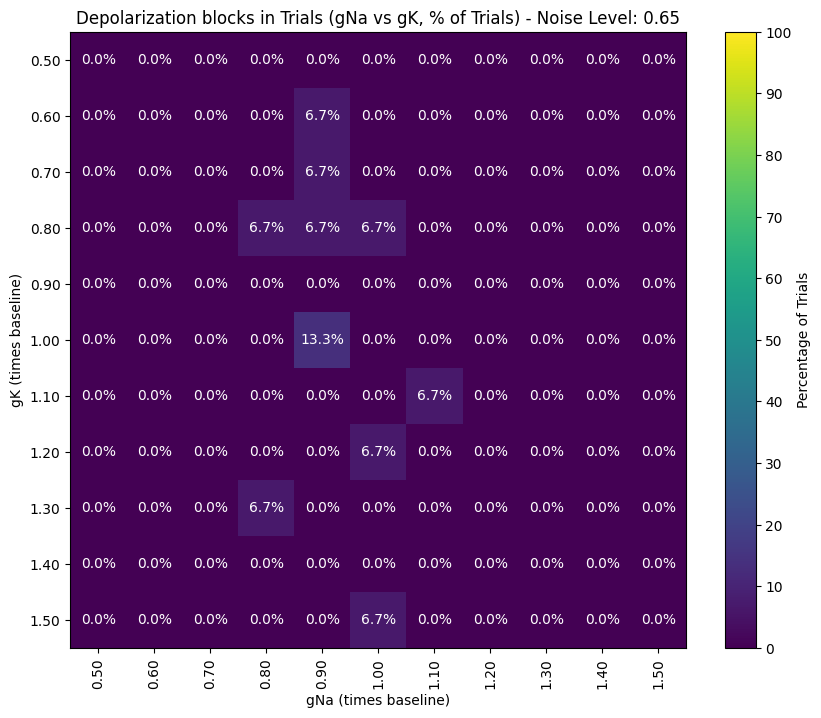

Data for noise level 0.7 loaded successfully.


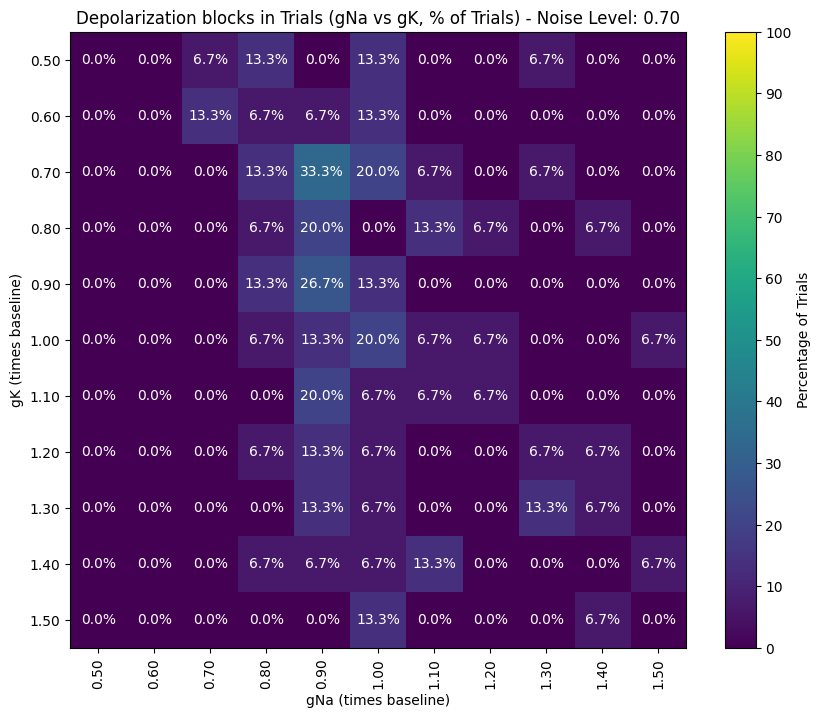

Data for noise level 0.75 loaded successfully.


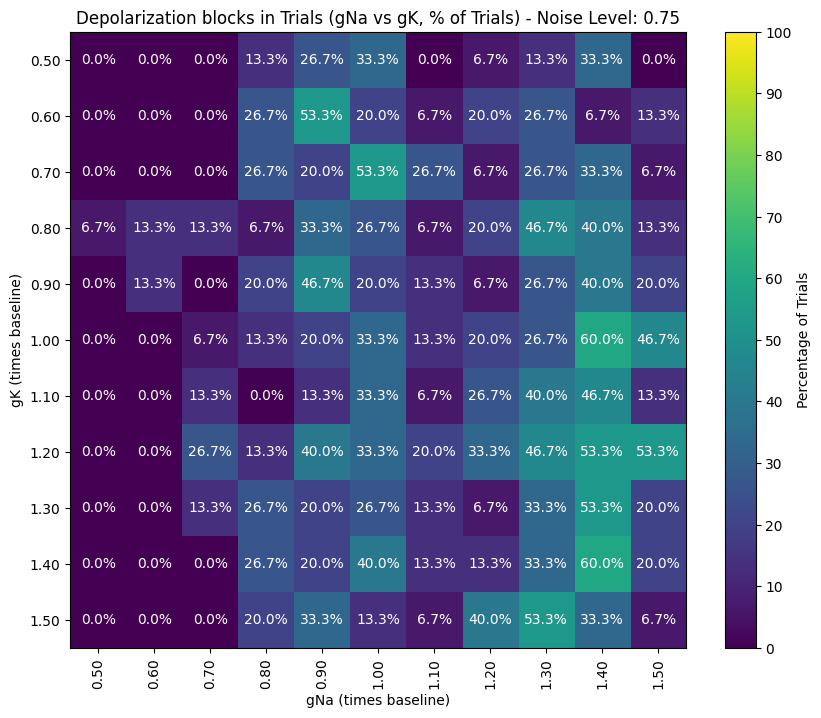

Data for noise level 0.8 loaded successfully.


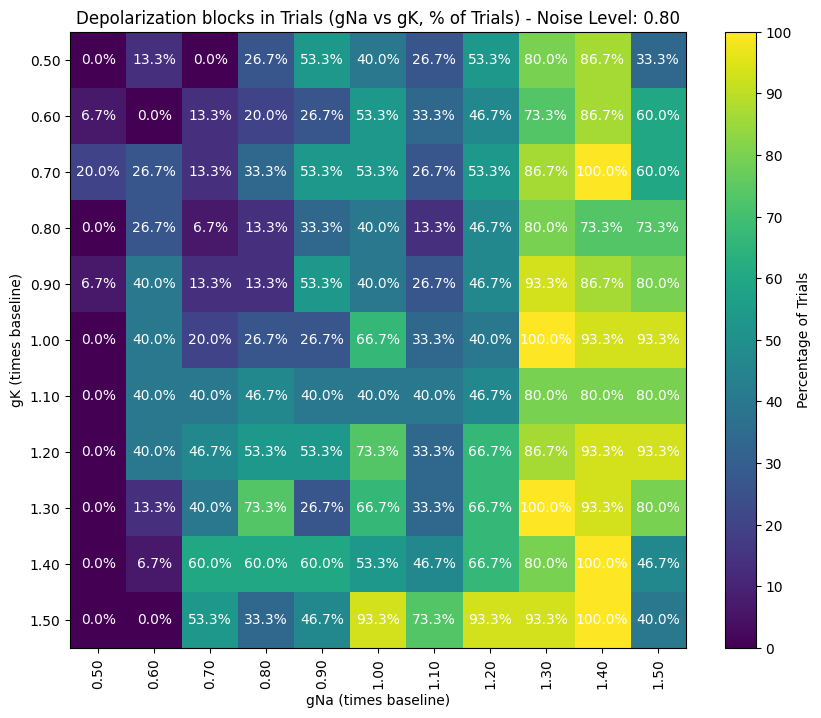

Data for noise level 0.85 loaded successfully.


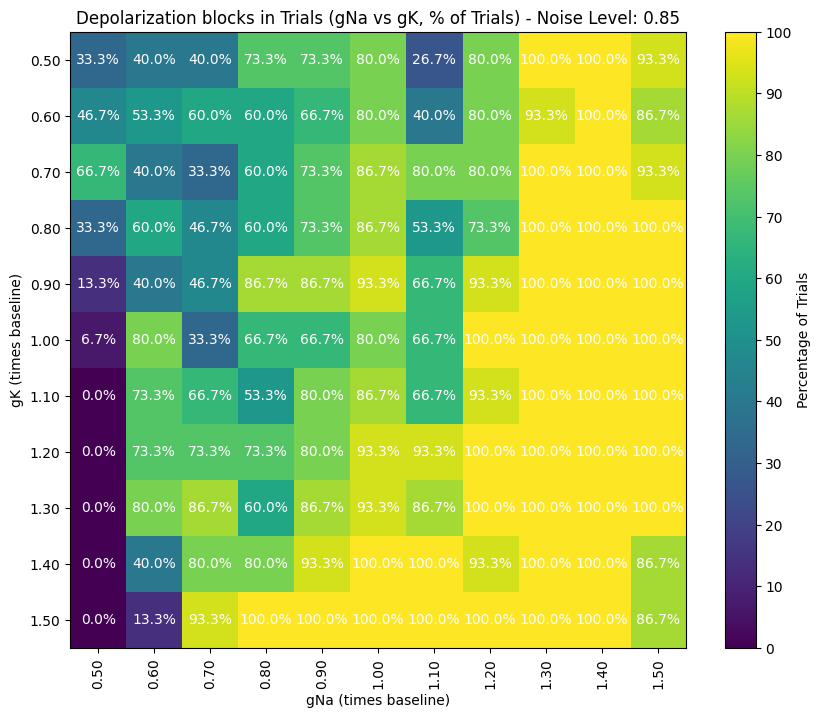

Data for noise level 0.9 loaded successfully.


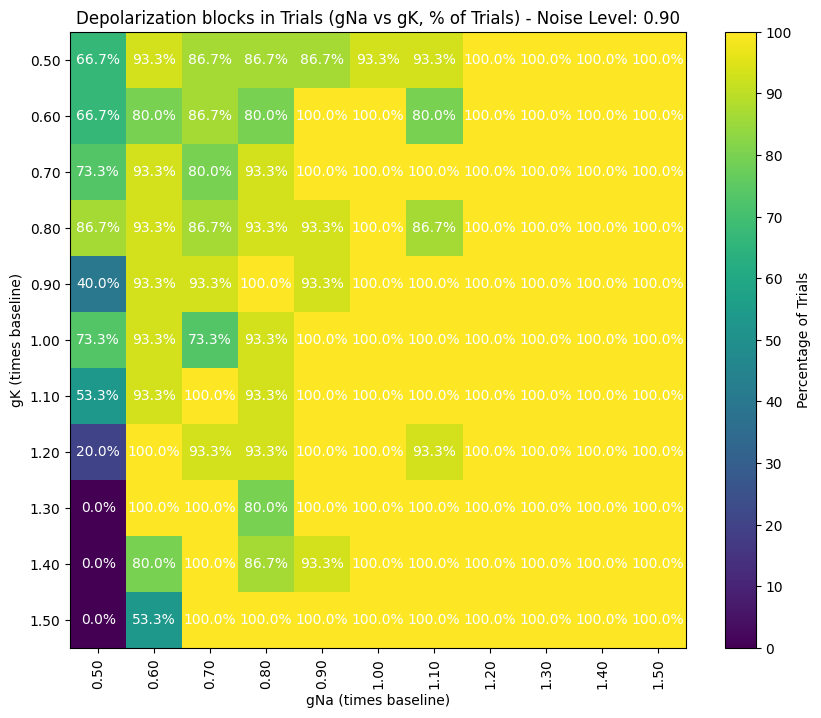

Data for noise level 0.95 loaded successfully.


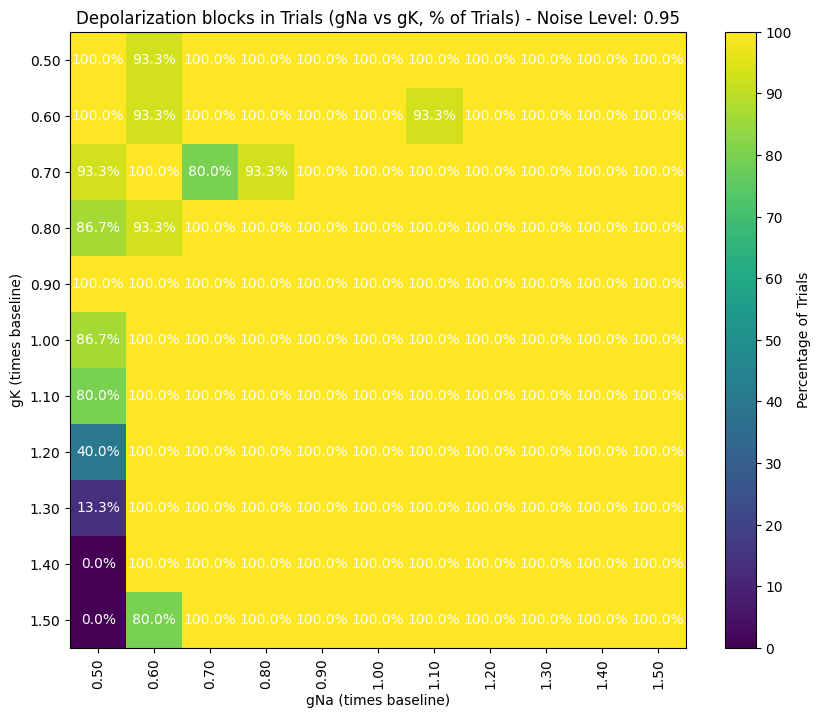

Data for noise level 1.0 loaded successfully.


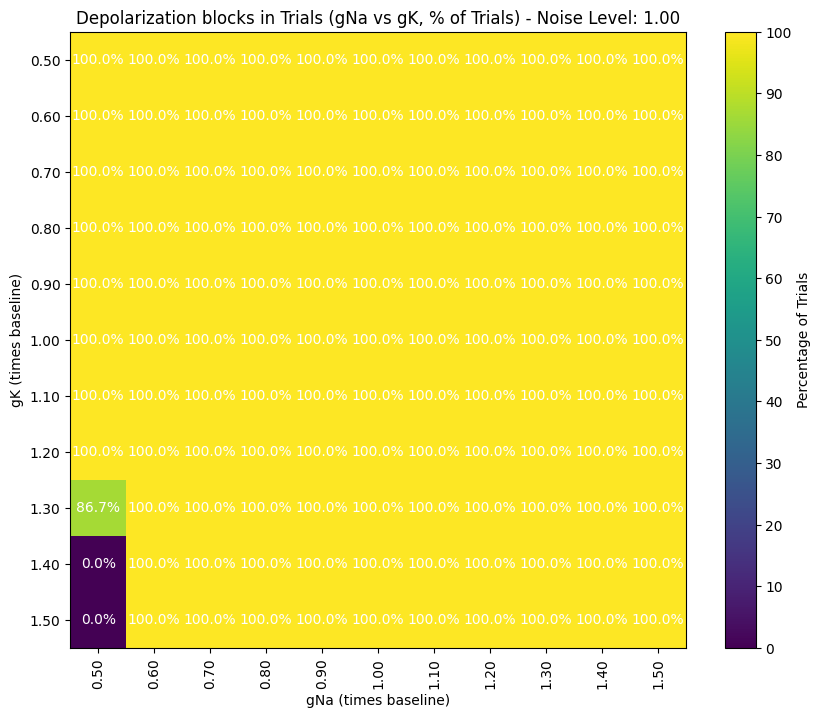

Data for noise level 1.1 loaded successfully.


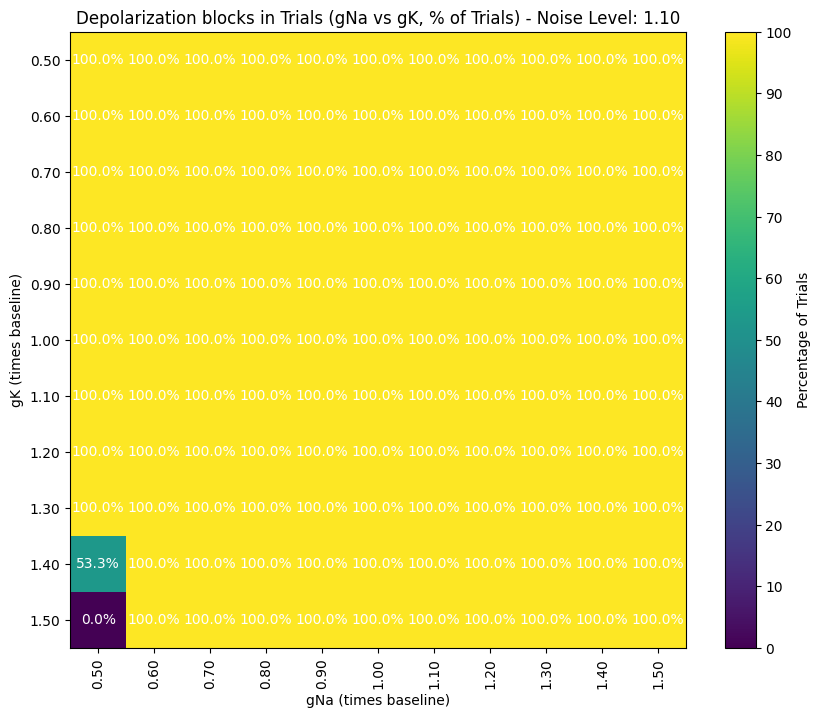

Data for noise level 1.2 loaded successfully.


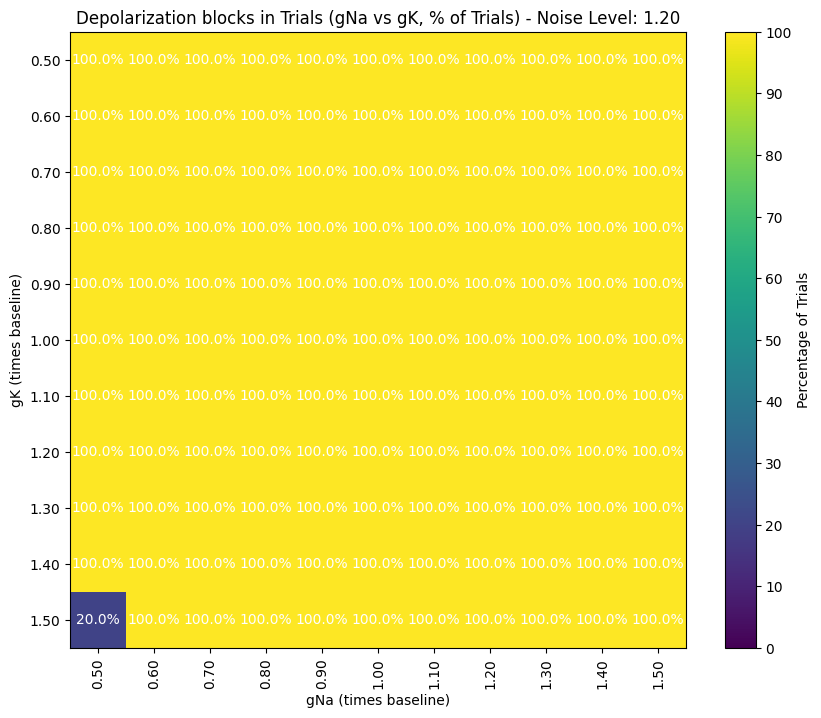

Data for noise level 1.3 loaded successfully.


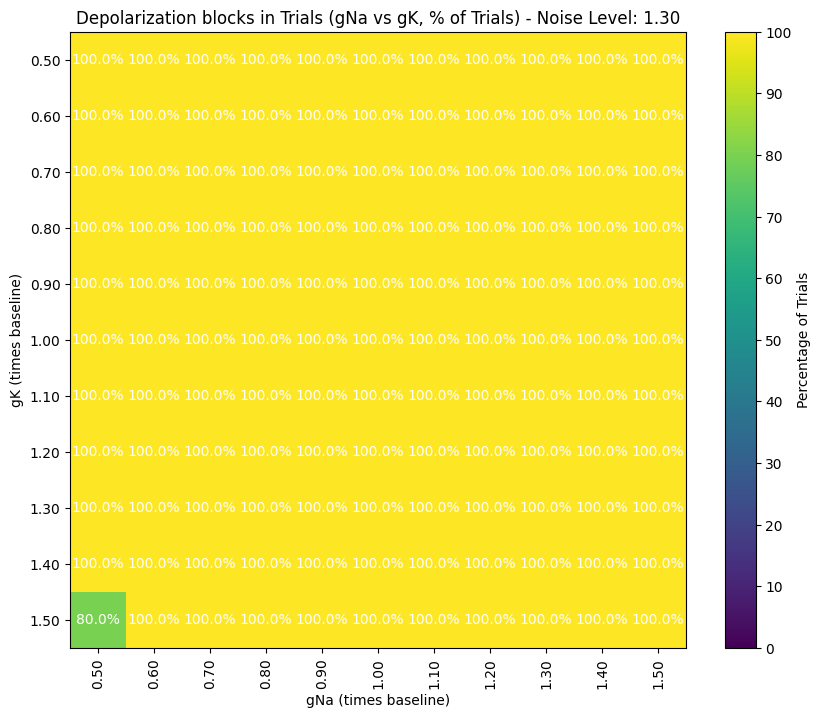

In [19]:
# import pickle
# from src.SanjayCode import plot_depolarization_percentage_matrix

# Corrected gNa and gK values to match the specified range
gna_values = [0.50 + 0.10 * i for i in range(11)]
gk_values = [0.50 + 0.10 * i for i in range(11)]

# List of noise levels
noise_levels = [0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.10, 1.20, 1.30]

# Base path to the pickle files with the results dictionary
base_path = "../Results/Noise_results/"

# Loop through each noise level, load the data, analyze, and plot
for noise_level in noise_levels:
    pkl_path = f"{base_path}noise_{noise_level:.2f}.pkl"

    # Load the pickle file
    try:
        with open(pkl_path, "rb") as file:
            results_dict = pickle.load(file)
        print(f"Data for noise level {noise_level} loaded successfully.")

        # Analyze the data
        analysis_results = analyze_single_noise_level(results_dict)

        # Plot the matrix
        plot_depolarization_percentage_matrix(
            analysis_results, gna_values, gk_values, noise_level
        )

    except Exception as e:
        print(f"Error loading the file {pkl_path}: {e}")

## Check the convolutions for artifacts


In [20]:
import pickle
import matplotlib.pyplot as plt
from src.SanjayCode import (
    get_spike_times_for_basket_cells,
    create_time_series,
    apply_gaussian_convolution,
    detect_depolarization_blocks,
    plot_results,
)

# Define the base path and file IDs for trials with weird depolarization patterns
base_path = "/mnt/internserver1_1tb/Data/MarcData/Data14_Current_Burst/gna_1.20_gk_1.20_noise_0.90"
file_ids = [f"{i:02d}" for i in range(15)]  # Generate file IDs from "00" to "14"


# Function to process and plot data for a single file
def process_and_plot_file(file_id):
    trial_path = f"{base_path}/{file_id}.pkl"

    # Load the trial pickle
    try:
        with open(trial_path, "rb") as file:
            data_trial = pickle.load(file)
        print(f"Data loaded successfully for file {file_id}.")
    except Exception as e:
        print(f"Error loading the file {file_id}:", e)
        return  # Skip this file if there's an error

    basket_spike_times = get_spike_times_for_basket_cells(data_trial, 800, 999)
    total_duration = 5000
    time_series = create_time_series(basket_spike_times, total_duration)
    convolved_signal = apply_gaussian_convolution(time_series)
    (
        depolarization_starts,
        depolarization_ends,
        threshold,
        total_depolarization_duration,
    ) = detect_depolarization_blocks(convolved_signal, total_duration)
    plot_results(
        convolved_signal,
        depolarization_starts,
        depolarization_ends,
        threshold,
        total_duration,
        title=f"Convolved Firing Rate of Basket Cells: Trial - {file_id}",
    )

    plt.show()  # Show the plot with the title


# # Iterate over each file ID and process it
# for file_id in file_ids:
#     process_and_plot_file(file_id)

## Average delay + STD for depolarization blocks for gna/gk conditions at all noise levels


CHANGE THE COLORING FOR THE 0.0 DELAY TO 5000


Data for noise level 0.65 loaded successfully.


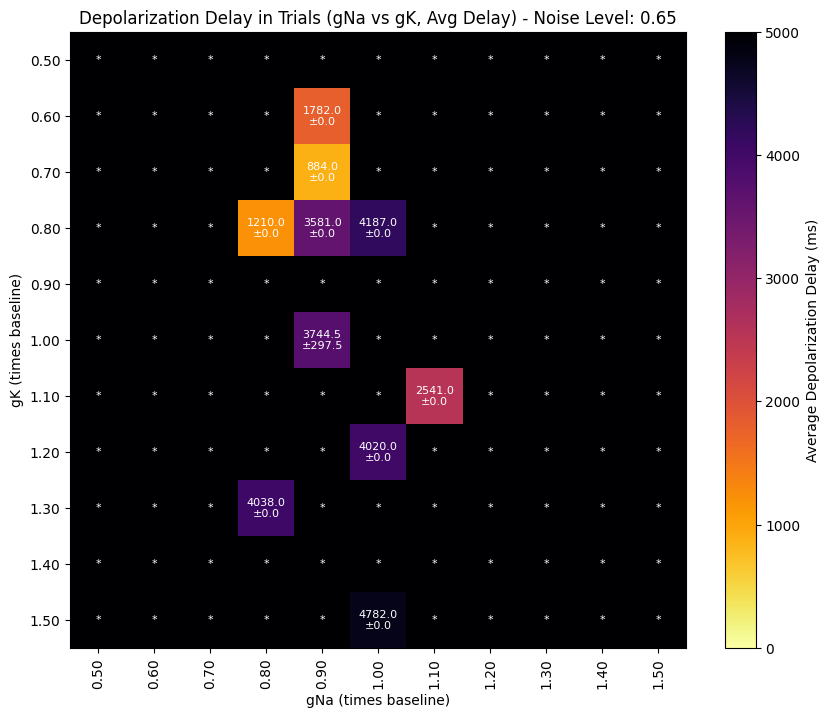

Data for noise level 0.7 loaded successfully.


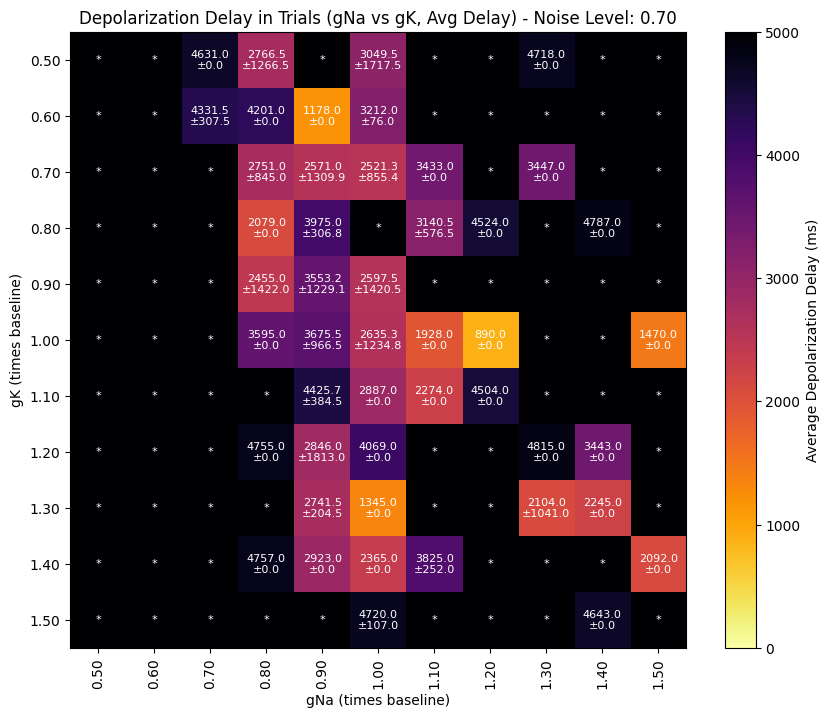

Data for noise level 0.75 loaded successfully.


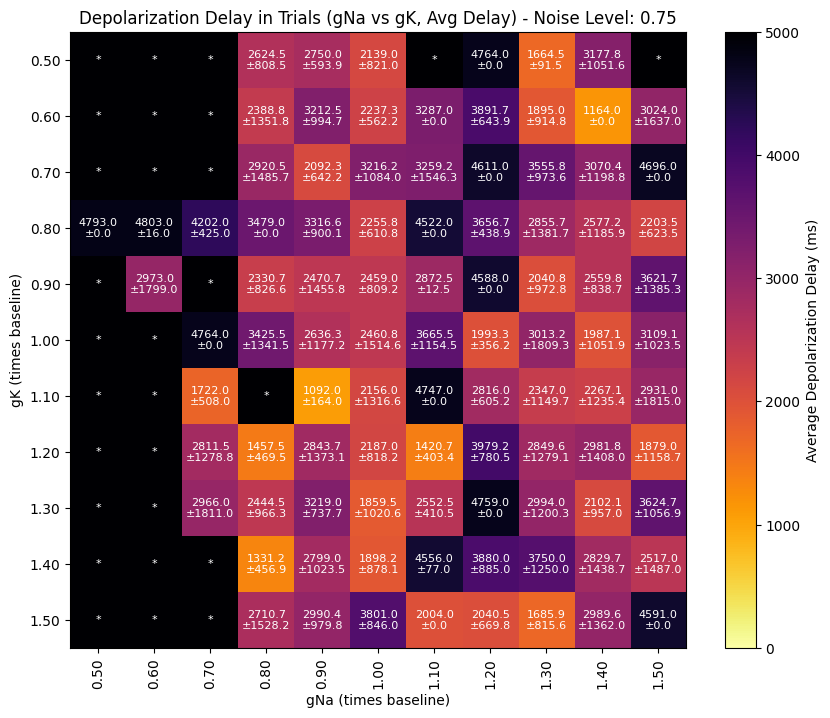

Data for noise level 0.8 loaded successfully.


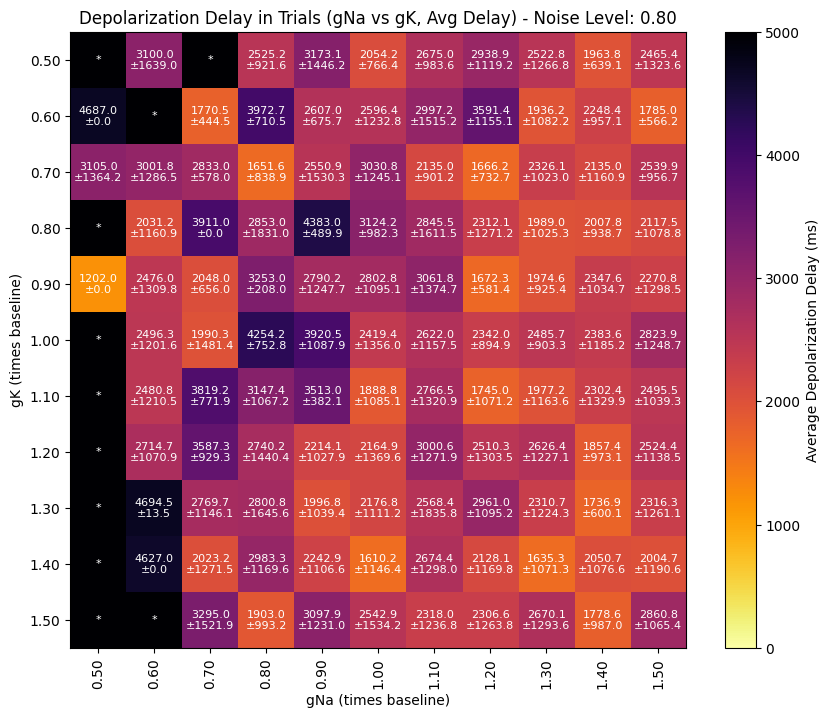

Data for noise level 0.85 loaded successfully.


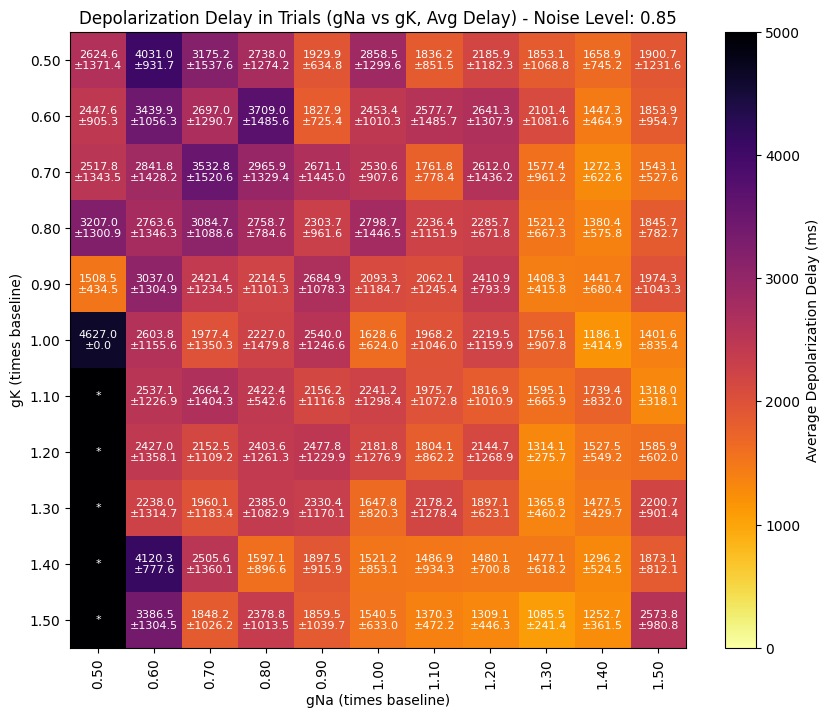

Data for noise level 0.9 loaded successfully.


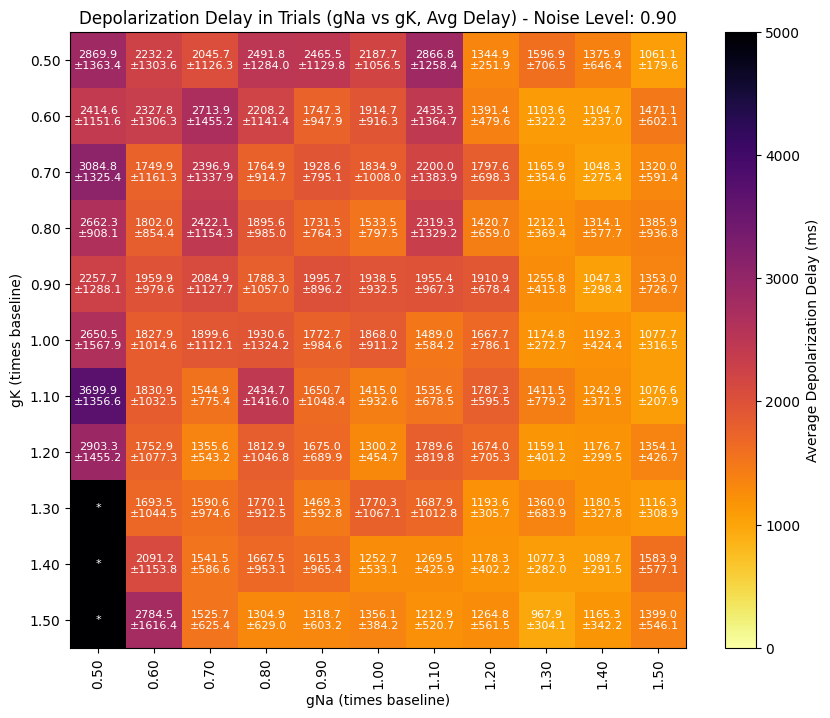

Data for noise level 0.95 loaded successfully.


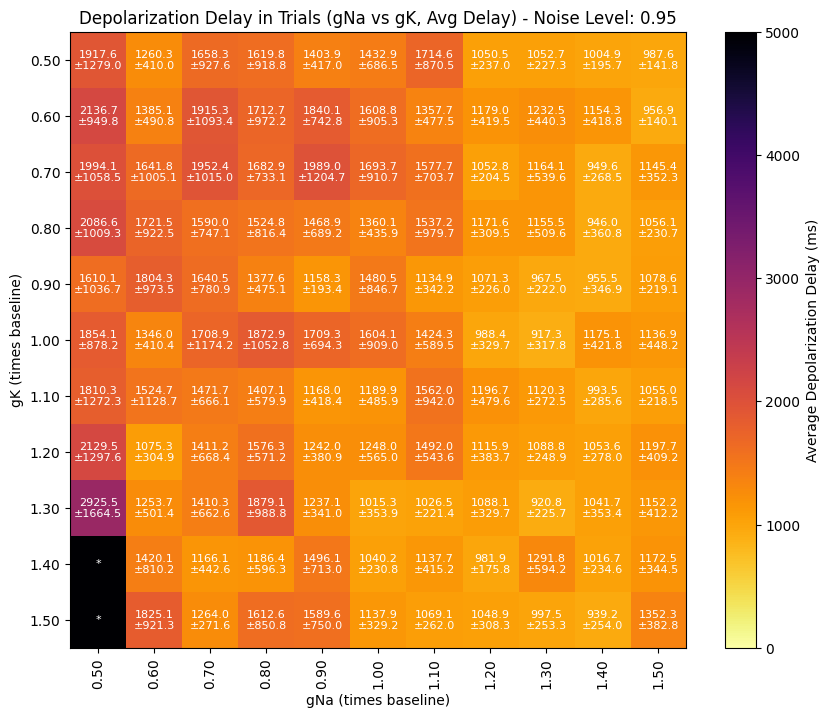

Data for noise level 1.0 loaded successfully.


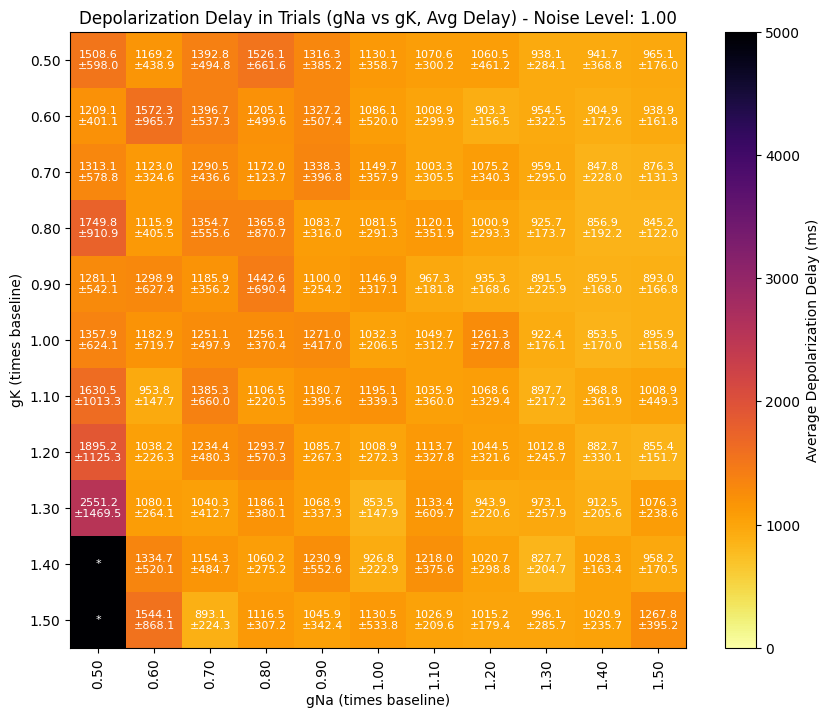

Data for noise level 1.1 loaded successfully.


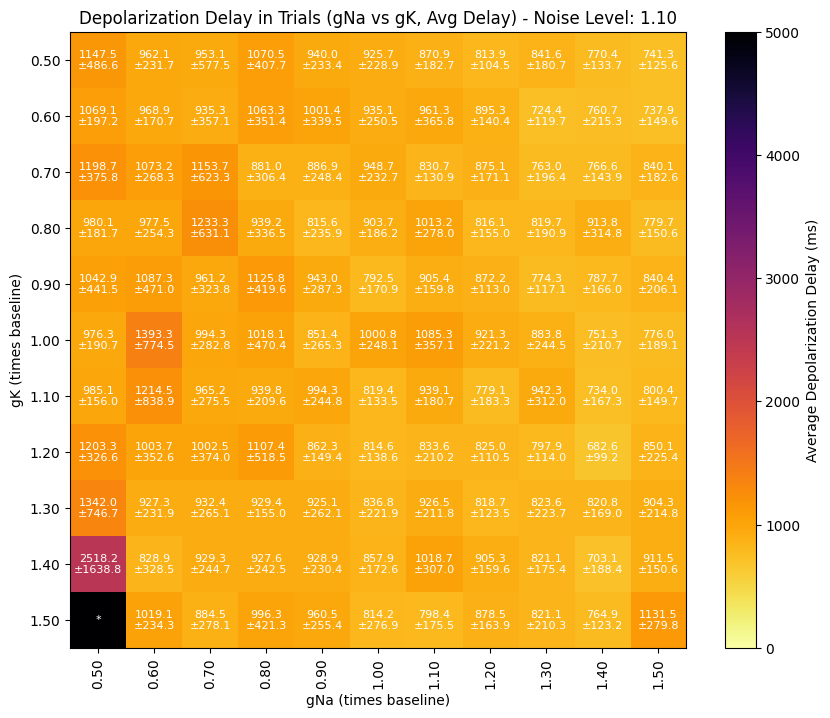

Data for noise level 1.2 loaded successfully.


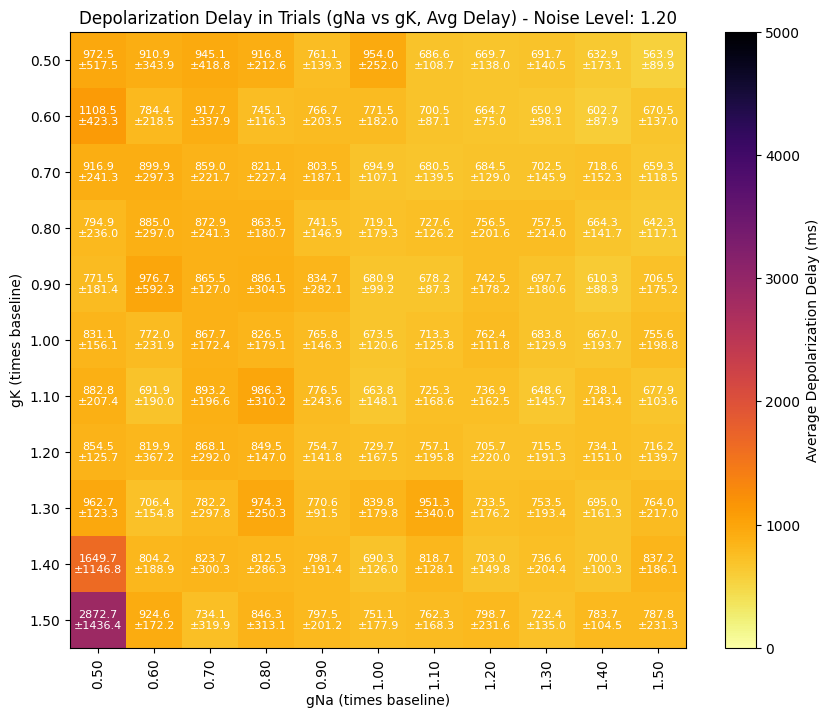

Data for noise level 1.3 loaded successfully.


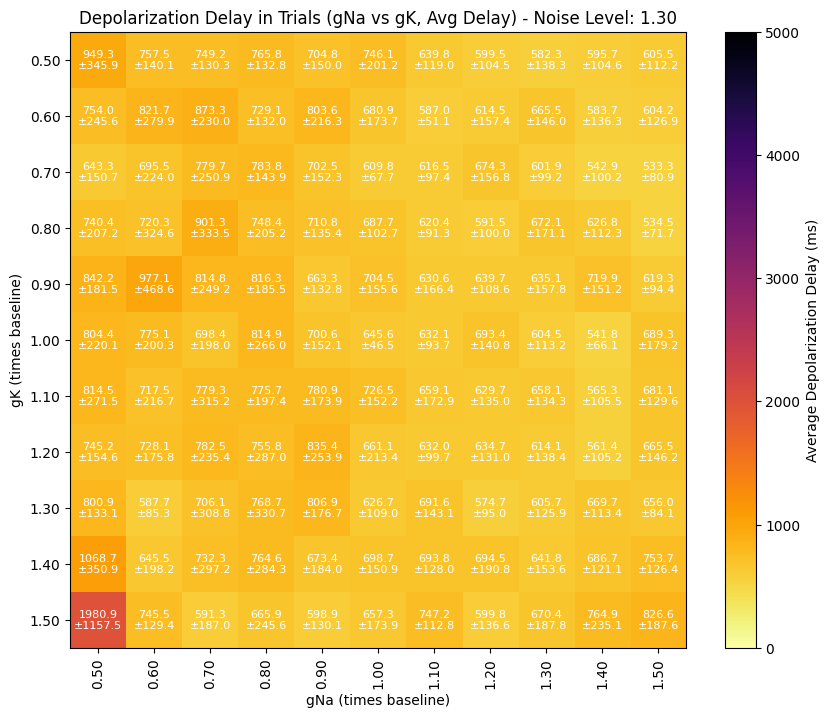

In [22]:
# import pickle
from src.SanjayCode import plot_depolarization_delay_matrix

# Corrected gNa and gK values to match the specified range
gna_values = [0.50 + 0.10 * i for i in range(11)]
gk_values = [0.50 + 0.10 * i for i in range(11)]

# List of noise levels
noise_levels = [0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.10, 1.20, 1.30]

# Base path to the pickle files with the results dictionary
base_path = "../Results/Noise_results/"

# Loop through each noise level, load the data, analyze, and plot
for noise_level in noise_levels:
    pkl_path = f"{base_path}noise_{noise_level:.2f}.pkl"

    # Load the pickle file
    try:
        with open(pkl_path, "rb") as file:
            results_dict = pickle.load(file)
        print(f"Data for noise level {noise_level} loaded successfully.")

        # Analyze the data
        analysis_results = analyze_single_noise_level(results_dict)

        # Plot the matrix
        plot_depolarization_delay_matrix(
            analysis_results, gna_values, gk_values, noise_level
        )

    except Exception as e:
        print(f"Error loading the file {pkl_path}: {e}")